Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-2-Applied-Modeling/master/data/Restaurant_Consumer_Data_merged'

import pandas as pd

df = pd.read_csv(url)

In [2]:
df.head()

,userID,placeID,rating,food_rating,service_rating,Ulatitude,Ulongitude,smoker,drink_level,dress_preference,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,U1077,135085,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,U1077,135038,2,2,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,U1077,132825,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,U1077,135060,1,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,U1077,135027,0,1,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

target1 = 'rating'
target2 = 'food_rating'
target3 = 'service_rating'

X = df.drop(columns=[target1, target2, target3])
y1 = df[target1]
y2 = df[target2]
y3 = df[target3]

X_train, X_test= train_test_split(X, test_size=0.2, random_state=7)
y1_train, y1_test,y2_train, y2_test,y3_train, y3_test= train_test_split(y1,y2,y3, test_size=0.2, random_state=7)
X_train.shape, X_test.shape,y1_train.shape, y1_test.shape,y2_train.shape, y2_test.shape,y3_train.shape, y3_test.shape

((928, 495), (233, 495), (928,), (233,), (928,), (233,), (928,), (233,))

In [5]:
print(y1_train.value_counts(normalize=True))
print(y2_train.value_counts(normalize=True))
print(y3_train.value_counts(normalize=True))

2    0.415948
1    0.358836
0    0.225216
Name: rating, dtype: float64
2    0.437500
1    0.329741
0    0.232759
Name: food_rating, dtype: float64
1    0.365302
2    0.358836
0    0.275862
Name: service_rating, dtype: float64


In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy= 'stratified',random_state=7)
y1_pred = dummy.fit(X_train, y1_train).predict(y1_test)
print(accuracy_score(y1_test, y1_pred))
y2_pred = dummy.fit(X_train, y2_train).predict(y2_test)
print(accuracy_score(y2_test, y2_pred))
y3_pred = dummy.fit(X_train, y3_train).predict(y3_test)
print(accuracy_score(y3_test, y3_pred))

0.3218884120171674
0.40772532188841204
0.296137339055794


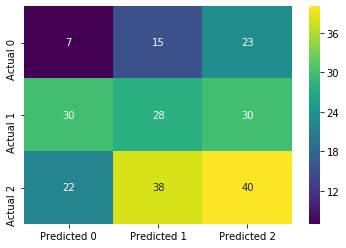

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y1_test, y1_pred);

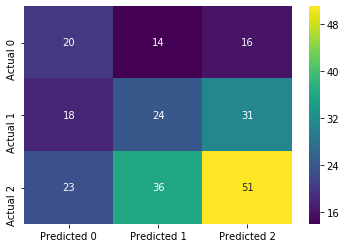

In [12]:
plot_confusion_matrix(y2_test, y2_pred);

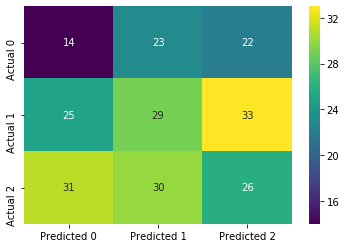

In [13]:
plot_confusion_matrix(y3_test, y3_pred);

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))
print(classification_report(y2_test, y2_pred))
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.12      0.16      0.13        45
           1       0.35      0.32      0.33        88
           2       0.43      0.40      0.41       100

    accuracy                           0.32       233
   macro avg       0.30      0.29      0.29       233
weighted avg       0.34      0.32      0.33       233

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        50
           1       0.32      0.33      0.33        73
           2       0.52      0.46      0.49       110

    accuracy                           0.41       233
   macro avg       0.39      0.40      0.39       233
weighted avg       0.42      0.41      0.41       233

              precision    recall  f1-score   support

           0       0.20      0.24      0.22        59
           1       0.35      0.33      0.34        87
           2       0.32      0.30      0.31        87

    accuracy        

In [33]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y1_test, y1_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y1_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.3218884120171674


array([0.56149733, 0.53763441, 0.55376344, 0.52972973, 0.5326087 ])

In [36]:
model.fit(X_train.drop(columns=['userID','placeID']), y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
model.predict(y1_test)

ValueError: feature_names mismatch: ['Ulatitude', 'Ulongitude', 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'color', 'weight', 'budget', 'height', 'Upayment_American_Express', 'Upayment_MasterCard-Eurocard', 'Upayment_VISA', 'Upayment_bank_debit_cards', 'Upayment_cash', 'Rcuisine_Afghan_x', 'Rcuisine_African_x', 'Rcuisine_American_x', 'Rcuisine_Armenian_x', 'Rcuisine_Asian_x', 'Rcuisine_Australian', 'Rcuisine_Austrian', 'Rcuisine_Bagels_x', 'Rcuisine_Bakery_x', 'Rcuisine_Bar_x', 'Rcuisine_Bar_Pub_Brewery_x', 'Rcuisine_Barbecue_x', 'Rcuisine_Basque', 'Rcuisine_Brazilian_x', 'Rcuisine_Breakfast-Brunch_x', 'Rcuisine_British', 'Rcuisine_Burgers_x', 'Rcuisine_Burmese', 'Rcuisine_Cafe-Coffee_Shop_x', 'Rcuisine_Cafeteria_x', 'Rcuisine_Cajun-Creole', 'Rcuisine_California_x', 'Rcuisine_Cambodian', 'Rcuisine_Canadian', 'Rcuisine_Caribbean_x', 'Rcuisine_Chilean', 'Rcuisine_Chinese_x', 'Rcuisine_Contemporary_x', 'Rcuisine_Continental-European_x', 'Rcuisine_Cuban', 'Rcuisine_Deli-Sandwiches_x', 'Rcuisine_Dessert-Ice_Cream_x', 'Rcuisine_Dim_Sum', 'Rcuisine_Diner_x', 'Rcuisine_Doughnuts', 'Rcuisine_Dutch-Belgian_x', 'Rcuisine_Eastern_European_x', 'Rcuisine_Eclectic', 'Rcuisine_Ethiopian_x', 'Rcuisine_Family_x', 'Rcuisine_Fast_Food_x', 'Rcuisine_Filipino', 'Rcuisine_Fine_Dining_x', 'Rcuisine_French_x', 'Rcuisine_Fusion', 'Rcuisine_Game_x', 'Rcuisine_German_x', 'Rcuisine_Greek_x', 'Rcuisine_Hawaiian', 'Rcuisine_Hot_Dogs_x', 'Rcuisine_Hungarian', 'Rcuisine_Indian-Pakistani', 'Rcuisine_Indigenous', 'Rcuisine_Indonesian', 'Rcuisine_International_x', 'Rcuisine_Irish', 'Rcuisine_Israeli', 'Rcuisine_Italian_x', 'Rcuisine_Jamaican', 'Rcuisine_Japanese_x', 'Rcuisine_Juice_x', 'Rcuisine_Korean_x', 'Rcuisine_Kosher', 'Rcuisine_Latin_American_x', 'Rcuisine_Lebanese', 'Rcuisine_Malaysian', 'Rcuisine_Mediterranean_x', 'Rcuisine_Mexican_x', 'Rcuisine_Middle_Eastern', 'Rcuisine_Mongolian_x', 'Rcuisine_Moroccan', 'Rcuisine_North_African', 'Rcuisine_Organic-Healthy_x', 'Rcuisine_Pacific_Northwest', 'Rcuisine_Pacific_Rim', 'Rcuisine_Persian_x', 'Rcuisine_Peruvian', 'Rcuisine_Pizzeria_x', 'Rcuisine_Polish_x', 'Rcuisine_Polynesian', 'Rcuisine_Portuguese', 'Rcuisine_Regional_x', 'Rcuisine_Romanian', 'Rcuisine_Russian-Ukrainian', 'Rcuisine_Scandinavian', 'Rcuisine_Seafood_x', 'Rcuisine_Soup_x', 'Rcuisine_Southeast_Asian', 'Rcuisine_Southern_x', 'Rcuisine_Southwestern_x', 'Rcuisine_Spanish_x', 'Rcuisine_Steaks_x', 'Rcuisine_Sushi_x', 'Rcuisine_Swiss', 'Rcuisine_Tapas', 'Rcuisine_Tea_House', 'Rcuisine_Tex-Mex', 'Rcuisine_Thai_x', 'Rcuisine_Tibetan', 'Rcuisine_Tunisian', 'Rcuisine_Turkish_x', 'Rcuisine_Vegetarian_x', 'Rcuisine_Vietnamese_x', 'latitude', 'longitude', 'city', 'state', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience', 'franchise', 'area', 'other_services', 'parking_lot_fee', 'parking_lot_none', 'parking_lot_public', 'parking_lot_street', 'parking_lot_valet parking', 'parking_lot_validated parking', 'parking_lot_yes', 'days_Mon;Tue;Wed;Thu;Fri;', 'days_Sat;', 'days_Sun;', 'hours_00:00-00:00;', 'hours_00:00-23:30;', 'hours_01:00-01:00;', 'hours_01:00-20:30;', 'hours_01:00-23:30;', 'hours_02:00-23:30;', 'hours_03:00-23:30;', 'hours_04:00-23:30;', 'hours_04:30-23:30;', 'hours_05:30-12:00;13:30-12:00;10:30-22:00;', 'hours_06:00-00:00;', 'hours_06:00-03:00;', 'hours_06:00-18:00;', 'hours_06:00-23:00;', 'hours_06:00-23:30;', 'hours_06:30-15:00;', 'hours_06:30-17:00;', 'hours_06:30-21:00;', 'hours_06:30-22:00;', 'hours_06:30-23:30;', 'hours_07:00-00:00;', 'hours_07:00-00:30;', 'hours_07:00-11:00;', 'hours_07:00-13:00;', 'hours_07:00-13:30;', 'hours_07:00-14:00;', 'hours_07:00-14:30;', 'hours_07:00-15:00;', 'hours_07:00-16:00;', 'hours_07:00-18:30;', 'hours_07:00-19:00;', 'hours_07:00-20:00;', 'hours_07:00-21:00;', 'hours_07:00-22:00;', 'hours_07:00-22:30;', 'hours_07:00-23:00;', 'hours_07:00-23:30;', 'hours_07:30-02:00;', 'hours_07:30-14:30;', 'hours_07:30-18:00;', 'hours_07:30-23:30;', 'hours_08:00-11:00;', 'hours_08:00-12:00;', 'hours_08:00-13:00;', 'hours_08:00-14:00;', 'hours_08:00-15:00;', 'hours_08:00-15:30;', 'hours_08:00-16:00;', 'hours_08:00-17:00;', 'hours_08:00-18:00;', 'hours_08:00-19:00;', 'hours_08:00-20:00;', 'hours_08:00-20:30;', 'hours_08:00-21:00;', 'hours_08:00-21:30;', 'hours_08:00-22:00;', 'hours_08:00-22:30;', 'hours_08:00-23:00;', 'hours_08:00-23:00;12:00;', 'hours_08:00-23:30;', 'hours_08:30-12:00;', 'hours_08:30-15:00;', 'hours_08:30-19:30;', 'hours_08:30-20:00;', 'hours_08:30-21:00;', 'hours_08:30-23:00;', 'hours_08:30-23:30;', 'hours_09:00-01:00;', 'hours_09:00-12:00;', 'hours_09:00-13:00;', 'hours_09:00-15:00;', 'hours_09:00-16:00;', 'hours_09:00-17:00;', 'hours_09:00-17:30;', 'hours_09:00-18:00;', 'hours_09:00-19:00;', 'hours_09:00-20:00;', 'hours_09:00-20:30;', 'hours_09:00-21:00;', 'hours_09:00-22:00;', 'hours_09:00-22:30;', 'hours_09:00-23:00;', 'hours_09:00-23:30;', 'hours_09:30-16:00;', 'hours_09:30-17:00;', 'hours_09:30-20:00;', 'hours_09:30-20:30;', 'hours_09:30-21:00;', 'hours_09:30-21:30;', 'hours_09:30-22:00;', 'hours_09:30-23:30;', 'hours_10:00-00:00;;17:00-23:30;', 'hours_10:00-03:30;', 'hours_10:00-10:00;', 'hours_10:00-13:00;', 'hours_10:00-14:00;', 'hours_10:00-14:30;', 'hours_10:00-15:00;', 'hours_10:00-15:30;', 'hours_10:00-16:00;', 'hours_10:00-16:30;', 'hours_10:00-17:00;', 'hours_10:00-17:30;', 'hours_10:00-18:00;', 'hours_10:00-19:00;', 'hours_10:00-20:00;', 'hours_10:00-20:30;', 'hours_10:00-20:30;10:00-14:00;', 'hours_10:00-21:00;', 'hours_10:00-21:30;', 'hours_10:00-22:00;', 'hours_10:00-22:00;10:00-23:00;10:00-20:00;11:00-21:00;', 'hours_10:00-22:30;', 'hours_10:00-23:00;', 'hours_10:00-23:30;', 'hours_10:30-14:30;05:30-22:00;05:30-23:00;10:30-14:30;', 'hours_10:30-19:00;', 'hours_10:30-19:30;', 'hours_10:30-20:00;', 'hours_10:30-21:00;', 'hours_10:30-22:00;', 'hours_10:30-22:30;', 'hours_10:30-23:00;', 'hours_10:30-23:30;', 'hours_11:00-00:00;', 'hours_11:00-01:00;', 'hours_11:00-12:00;', 'hours_11:00-14:00;17:00-21:00;17:00-23:30;17:00-21:00;', 'hours_11:00-14:30;05:30-23:00;13:30-14:30;', 'hours_11:00-15:30;', 'hours_11:00-16:00;', 'hours_11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:00;', 'hours_11:00-18:00;', 'hours_11:00-18:30;', 'hours_11:00-19:00;', 'hours_11:00-19:30;', 'hours_11:00-20:00;', 'hours_11:00-21:00;', 'hours_11:00-21:30;', 'hours_11:00-22:00;', 'hours_11:00-22:30;', 'hours_11:00-23:00;', 'hours_11:00-23:30;', 'hours_11:30-19:00;', 'hours_11:30-20:00;', 'hours_11:30-21:00;', 'hours_11:30-22:00;', 'hours_11:30-22:30;', 'hours_11:30-23:30;', 'hours_12:00-00:00;', 'hours_12:00-14:00;', 'hours_12:00-14:00;10:00-22:00;', 'hours_12:00-14:30;', 'hours_12:00-15:00;15:00-21:00;', 'hours_12:00-15:00;18:00-22:00;', 'hours_12:00-17:00;', 'hours_12:00-17:00;16:00-22:00;', 'hours_12:00-18:00;', 'hours_12:00-18:30;', 'hours_12:00-19:00;', 'hours_12:00-19:30;', 'hours_12:00-20:00;', 'hours_12:00-21:00;', 'hours_12:00-22:00;', 'hours_12:00-22:30;', 'hours_12:00-23:00;', 'hours_12:00-23:30;', 'hours_12:30-16:30;16:00-22:00;', 'hours_12:30-19:00;', 'hours_12:30-20:30;', 'hours_12:30-21:30;', 'hours_12:30-23:30;', 'hours_13:00-00:00;', 'hours_13:00-00:30;', 'hours_13:00-01:00;', 'hours_13:00-08:00;', 'hours_13:00-17:00;', 'hours_13:00-18:00;', 'hours_13:00-19:00;', 'hours_13:00-20:00;', 'hours_13:00-21:00;', 'hours_13:00-22:00;', 'hours_13:00-22:30;', 'hours_13:00-23:00;', 'hours_13:00-23:30;', 'hours_13:30-12:00;00:00-23:30;13:30-02:00;01:30-23:00;', 'hours_13:30-13:00;15:00-22:00;', 'hours_13:30-15:00;05:30-22:00;', 'hours_13:30-15:00;21:30-23:30;', 'hours_13:30-18:30;', 'hours_13:30-19:00;', 'hours_13:30-20:00;', 'hours_13:30-20:30;', 'hours_13:30-22:00;', 'hours_13:30-22:30;', 'hours_13:30-22:30;22:00;', 'hours_13:30-23:00;', 'hours_13:30-23:30;', 'hours_14:00-02:00;', 'hours_14:00-18:00;', 'hours_14:00-18:30;', 'hours_14:00-20:00;', 'hours_14:00-20:30;', 'hours_14:00-21:00;', 'hours_14:00-22:00;', 'hours_14:00-23:00;', 'hours_14:00-23:30;', 'hours_14:30-20:00;', 'hours_15:00-03:00;', 'hours_15:00-21:00;', 'hours_15:00-23:30;', 'hours_16:00-21:00;', 'hours_16:00-22:00;12:00-22:00;', 'hours_16:00-23:30;', 'hours_16:30-22:00;11:00-22:00;11:00-23:00;04:30-23:00;', 'hours_16:30-22:30;', 'hours_16:30-23:00;', 'hours_17:00-00:00;', 'hours_17:00-01:00;', 'hours_17:00-03:00;', 'hours_17:00-21:00;', 'hours_17:00-22:00;', 'hours_17:00-22:00;12:00;', 'hours_17:00-23:00;', 'hours_17:00-23:30;', 'hours_17:30-01:30;', 'hours_18:00-01:00;', 'hours_18:00-02:00;', 'hours_18:00-04:30;', 'hours_18:00-05:30;', 'hours_18:00-07:00;', 'hours_18:00-11:00;', 'hours_18:00-21:00;', 'hours_18:00-22:00;', 'hours_18:00-22:30;', 'hours_18:00-23:30;', 'hours_18:30-01:00;', 'hours_18:30-23:00;', 'hours_18:30-23:30;', 'hours_19:00-00:30;', 'hours_19:00-01:00;', 'hours_19:00-02:00;', 'hours_19:00-04:00;', 'hours_19:00-12:00;', 'hours_19:00-22:30;', 'hours_19:00-23:00;', 'hours_19:00-23:30;', 'hours_19:30-02:00;', 'hours_19:30-23:30;', 'hours_20:00-00:30;', 'hours_20:00-01:00;', 'hours_20:00-01:30;', 'hours_20:00-02:00;', 'hours_20:00-03:00;', 'hours_20:00-03:30;', 'hours_20:00-05:00;', 'hours_20:00-20:00;', 'hours_20:00-23:30;', 'hours_20:30-20:30;', 'hours_20:30-21:00;', 'hours_20:30-23:30;', 'hours_21:00-00:00;', 'hours_21:00-01:00;', 'hours_21:00-01:30;', 'hours_21:00-02:00;', 'hours_21:00-03:00;', 'hours_21:00-23:30;', 'hours_21:30-01:00;', 'hours_21:30-13:00;', 'hours_21:30-19:00;', 'hours_21:30-21:00;', 'hours_21:30-22:00;', 'hours_21:30-23:00;', 'Rcuisine_Afghan_y', 'Rcuisine_African_y', 'Rcuisine_American_y', 'Rcuisine_Armenian_y', 'Rcuisine_Asian_y', 'Rcuisine_Bagels_y', 'Rcuisine_Bakery_y', 'Rcuisine_Bar_y', 'Rcuisine_Bar_Pub_Brewery_y', 'Rcuisine_Barbecue_y', 'Rcuisine_Brazilian_y', 'Rcuisine_Breakfast-Brunch_y', 'Rcuisine_Burgers_y', 'Rcuisine_Cafe-Coffee_Shop_y', 'Rcuisine_Cafeteria_y', 'Rcuisine_California_y', 'Rcuisine_Caribbean_y', 'Rcuisine_Chinese_y', 'Rcuisine_Contemporary_y', 'Rcuisine_Continental-European_y', 'Rcuisine_Deli-Sandwiches_y', 'Rcuisine_Dessert-Ice_Cream_y', 'Rcuisine_Diner_y', 'Rcuisine_Dutch-Belgian_y', 'Rcuisine_Eastern_European_y', 'Rcuisine_Ethiopian_y', 'Rcuisine_Family_y', 'Rcuisine_Fast_Food_y', 'Rcuisine_Fine_Dining_y', 'Rcuisine_French_y', 'Rcuisine_Game_y', 'Rcuisine_German_y', 'Rcuisine_Greek_y', 'Rcuisine_Hot_Dogs_y', 'Rcuisine_International_y', 'Rcuisine_Italian_y', 'Rcuisine_Japanese_y', 'Rcuisine_Juice_y', 'Rcuisine_Korean_y', 'Rcuisine_Latin_American_y', 'Rcuisine_Mediterranean_y', 'Rcuisine_Mexican_y', 'Rcuisine_Mongolian_y', 'Rcuisine_Organic-Healthy_y', 'Rcuisine_Persian_y', 'Rcuisine_Pizzeria_y', 'Rcuisine_Polish_y', 'Rcuisine_Regional_y', 'Rcuisine_Seafood_y', 'Rcuisine_Soup_y', 'Rcuisine_Southern_y', 'Rcuisine_Southwestern_y', 'Rcuisine_Spanish_y', 'Rcuisine_Steaks_y', 'Rcuisine_Sushi_y', 'Rcuisine_Thai_y', 'Rcuisine_Turkish_y', 'Rcuisine_Vegetarian_y', 'Rcuisine_Vietnamese_y', 'Rpayment_American_Express', 'Rpayment_Carte_Blanche', 'Rpayment_Diners_Club', 'Rpayment_Discover', 'Rpayment_Japan_Credit_Bureau', 'Rpayment_MasterCard-Eurocard', 'Rpayment_VISA', 'Rpayment_Visa', 'Rpayment_bank_debit_cards', 'Rpayment_cash', 'Rpayment_checks', 'Rpayment_gift_certificates'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232']
expected hours_08:00-21:00;, hours_10:30-14:30;05:30-22:00;05:30-23:00;10:30-14:30;, hours_19:00-01:00;, hours_13:30-23:00;, hours_10:00-22:30;, hours_11:00-14:00;17:00-21:00;17:00-23:30;17:00-21:00;, hours_19:30-23:30;, Rcuisine_Swiss, Rpayment_American_Express, hours_11:30-20:00;, hours_14:00-18:30;, Rcuisine_Family_y, hours_10:00-16:30;, hours_17:00-03:00;, hours_21:30-22:00;, Rcuisine_Cafeteria_x, hours_13:00-21:00;, hours_16:30-22:30;, Rcuisine_Deli-Sandwiches_y, Rcuisine_International_x, hours_21:30-21:00;, Rcuisine_Armenian_y, Rcuisine_Mexican_y, hours_08:00-15:00;, Rcuisine_Basque, hours_00:00-00:00;, hours_10:00-21:00;, hours_09:00-20:00;, Rcuisine_Australian, hours_07:00-15:00;, hours_12:00-14:00;, Rcuisine_Malaysian, hours_10:00-20:00;, Rcuisine_Vegetarian_y, hours_17:00-01:00;, hours_21:30-23:00;, hours_09:30-23:30;, hours_06:00-00:00;, hours_06:30-17:00;, Rcuisine_Organic-Healthy_x, hours_21:00-23:30;, hours_11:30-22:00;, hours_10:00-18:00;, Rcuisine_Brazilian_x, hours_07:00-13:30;, hours_12:00-14:00;10:00-22:00;, hijos, Rcuisine_Cafe-Coffee_Shop_x, hours_17:00-22:00;12:00;, Rcuisine_Cafe-Coffee_Shop_y, Rcuisine_Korean_y, hours_18:30-01:00;, Rcuisine_Spanish_y, hours_08:00-13:00;, hours_13:30-23:30;, hours_16:30-22:00;11:00-22:00;11:00-23:00;04:30-23:00;, Rcuisine_Latin_American_x, hours_07:00-19:00;, Rcuisine_Pizzeria_y, hours_08:00-23:00;12:00;, Rcuisine_Bar_x, hours_07:30-18:00;, hours_07:00-11:00;, hours_12:00-00:00;, hours_20:30-21:00;, hours_08:30-15:00;, Rcuisine_Steaks_x, hours_07:00-22:30;, Rcuisine_International_y, Rcuisine_Romanian, hours_11:00-12:00;, Rcuisine_Greek_x, hours_07:00-13:00;, Rcuisine_Continental-European_y, hours_21:00-02:00;, Rcuisine_Soup_x, hours_16:00-23:30;, interest, Rpayment_VISA, Rcuisine_Dessert-Ice_Cream_x, Rcuisine_Eastern_European_x, hours_09:30-21:00;, hours_18:00-07:00;, Rpayment_cash, Rcuisine_Portuguese, hours_10:30-19:30;, Rcuisine_Southern_x, hours_08:00-21:30;, Rcuisine_Seafood_y, Rcuisine_Ethiopian_x, hours_13:00-18:00;, Rcuisine_Barbecue_y, hours_12:00-15:00;18:00-22:00;, hours_01:00-20:30;, hours_10:00-17:30;, Rcuisine_California_x, Rpayment_Discover, hours_13:30-22:00;, hours_09:00-12:00;, hours_09:00-20:30;, hours_09:30-16:00;, hours_10:00-22:00;, Rcuisine_American_y, hours_12:00-19:30;, hours_06:30-21:00;, hours_18:00-05:30;, religion, Rpayment_MasterCard-Eurocard, hours_12:00-23:30;, hours_12:30-21:30;, hours_19:00-22:30;, Rcuisine_Contemporary_y, Rcuisine_Persian_y, Rcuisine_Ethiopian_y, hours_10:00-14:00;, hours_11:00-21:00;, Rcuisine_Caribbean_x, Rcuisine_Peruvian, hours_11:00-23:30;, Upayment_American_Express, alcohol, hours_20:30-20:30;, hours_10:00-23:00;, hours_08:00-23:30;, hours_20:00-03:30;, hours_19:00-00:30;, Rcuisine_Continental-European_x, hours_09:00-23:30;, Rcuisine_Italian_x, hours_08:00-14:00;, hours_08:30-19:30;, hours_21:30-01:00;, hours_06:30-15:00;, Rcuisine_Sushi_x, hours_08:00-23:00;, Rcuisine_Thai_y, hours_07:00-16:00;, hours_13:30-20:00;, Rcuisine_Asian_y, hours_13:00-22:00;, hours_12:30-23:30;, hours_07:00-00:00;, Rcuisine_Mongolian_x, Rcuisine_Regional_x, Rcuisine_Sushi_y, Rcuisine_Seafood_x, hours_13:00-17:00;, hours_15:00-03:00;, Rcuisine_Japanese_y, parking_lot_none, hours_08:30-12:00;, hours_09:00-22:30;, hours_18:00-11:00;, Rcuisine_Moroccan, Rcuisine_Tibetan, Rcuisine_Bar_Pub_Brewery_y, weight, Rcuisine_Mediterranean_x, hours_13:30-19:00;, hours_15:00-21:00;, hours_11:00-01:00;, hours_08:00-19:00;, Rcuisine_Hawaiian, Rcuisine_Japanese_x, hours_14:00-22:00;, Rcuisine_African_y, Rpayment_Carte_Blanche, Rcuisine_Southwestern_y, Rcuisine_Bakery_x, days_Sat;, Rcuisine_Polish_x, hours_18:00-21:00;, hours_10:00-00:00;;17:00-23:30;, hours_13:30-13:00;15:00-22:00;, Rcuisine_Indian-Pakistani, hours_07:00-23:00;, hours_20:00-01:30;, hours_11:00-19:30;, Rcuisine_Thai_x, Rcuisine_Hot_Dogs_x, hours_07:00-22:00;, hours_11:00-18:00;, Ulongitude, drink_level, Rcuisine_Pacific_Rim, hours_12:00-22:30;, Rcuisine_Lebanese, hours_09:30-20:30;, hours_20:00-20:00;, Rcuisine_Polish_y, hours_10:00-14:30;, hours_09:30-20:00;, Rcuisine_Tunisian, hours_13:00-08:00;, hours_13:00-00:30;, Rcuisine_Burgers_y, Rcuisine_Afghan_x, longitude, hours_20:00-01:00;, hours_13:00-00:00;, hours_20:00-03:00;, hours_13:00-20:00;, hours_10:30-22:30;, hours_10:00-15:00;, hours_20:00-00:30;, Rcuisine_Cafeteria_y, Rcuisine_Spanish_x, hours_08:00-17:00;, Rcuisine_Contemporary_x, Rcuisine_Fast_Food_x, Rcuisine_Polynesian, hours_11:00-23:00;, dress_code, hours_14:00-23:30;, hours_13:00-23:00;, hours_13:00-19:00;, hours_19:00-23:30;, hours_09:30-21:30;, hours_01:00-01:00;, other_services, hours_11:00-22:30;, hours_07:00-23:30;, Rcuisine_Burmese, hours_10:00-20:30;, hours_09:00-18:00;, hours_04:00-23:30;, Rcuisine_Juice_y, hours_08:00-16:00;, color, Rcuisine_Vietnamese_x, franchise, Rcuisine_Fine_Dining_x, parking_lot_yes, hours_10:00-15:30;, hours_20:30-23:30;, personality, hours_17:30-01:30;, Rcuisine_Afghan_y, hours_14:00-21:00;, Rcuisine_Latin_American_y, hours_08:30-23:00;, hours_13:30-15:00;05:30-22:00;, hours_14:00-20:00;, smoking_area, parking_lot_street, Upayment_cash, hours_06:00-03:00;, hours_13:30-20:30;, Rcuisine_Game_x, hours_08:30-23:30;, hours_14:00-23:00;, hours_09:30-17:00;, hours_09:00-19:00;, Rcuisine_Kosher, Rcuisine_Indonesian, hours_10:00-10:00;, Rcuisine_Bagels_x, hours_09:00-17:00;, hours_17:00-22:00;, hours_11:00-19:00;, Rcuisine_Soup_y, hours_19:00-04:00;, hours_13:00-23:30;, Rcuisine_Tapas, area, Rcuisine_Hot_Dogs_y, hours_08:00-22:00;, hours_21:00-01:30;, Rcuisine_Steaks_y, Rcuisine_Armenian_x, hours_08:00-20:00;, hours_08:00-11:00;, hours_10:00-20:30;10:00-14:00;, Rcuisine_North_African, hours_05:30-12:00;13:30-12:00;10:30-22:00;, Rpayment_gift_certificates, hours_12:30-16:30;16:00-22:00;, hours_07:00-14:00;, Rcuisine_Fast_Food_y, Rcuisine_Southeast_Asian, parking_lot_fee, Rcuisine_Southern_y, Rcuisine_Chilean, Rcuisine_Diner_x, hours_13:30-15:00;21:30-23:30;, hours_08:00-22:30;, transport, hours_09:00-21:00;, hours_16:00-21:00;, hours_13:30-18:30;, hours_04:30-23:30;, Rcuisine_Persian_x, accessibility, hours_18:30-23:00;, days_Mon;Tue;Wed;Thu;Fri;, hours_14:00-18:00;, Rcuisine_Filipino, birth_year, hours_06:30-22:00;, Rcuisine_Tea_House, hours_19:00-23:00;, Rcuisine_German_x, Rcuisine_Vegetarian_x, Rpayment_bank_debit_cards, hours_07:30-02:00;, hours_08:30-21:00;, hours_02:00-23:30;, hours_11:00-22:00;, hours_11:00-14:30;05:30-23:00;13:30-14:30;, hours_19:00-02:00;, hours_20:00-02:00;, Rcuisine_Doughnuts, Rpayment_checks, hours_18:00-23:30;, hours_12:00-15:00;15:00-21:00;, hours_19:30-02:00;, Rcuisine_Brazilian_y, hours_12:30-20:30;, Rcuisine_Breakfast-Brunch_y, hours_17:00-23:30;, Rcuisine_Regional_y, Rcuisine_Russian-Ukrainian, hours_12:00-14:30;, Rcuisine_Pacific_Northwest, Rcuisine_Diner_y, Rcuisine_Family_x, hours_11:30-19:00;, hours_10:00-03:30;, hours_21:00-00:00;, hours_13:00-22:30;, hours_06:00-23:00;, Rcuisine_French_y, hours_11:30-21:00;, hours_18:00-02:00;, Rcuisine_Irish, hours_10:00-21:30;, hours_09:00-22:00;, Rcuisine_Eastern_European_y, hours_12:00-23:00;, hours_08:00-20:30;, hours_10:00-17:00;, Rcuisine_Cambodian, hours_20:00-05:00;, Upayment_bank_debit_cards, hours_06:00-18:00;, Rcuisine_Southwestern_x, hours_00:00-23:30;, hours_12:00-21:00;, smoker, parking_lot_validated parking, hours_11:00-00:00;, hours_11:00-16:00;, hours_07:00-14:30;, Rcuisine_African_x, Rcuisine_Fusion, hours_12:00-18:00;, Rcuisine_Mediterranean_y, hours_18:00-01:00;, hours_10:30-22:00;, hours_01:00-23:30;, hours_11:30-22:30;, parking_lot_valet parking, hours_07:30-23:30;, Rcuisine_French_x, Rcuisine_Chinese_x, hours_20:00-23:30;, Rcuisine_American_x, hours_13:30-22:30;22:00;, Rcuisine_Eclectic, Rcuisine_Pizzeria_x, hours_16:00-22:00;12:00-22:00;, Rcuisine_Dutch-Belgian_x, days_Sun;, hours_08:00-18:00;, Rcuisine_Mexican_x, hours_09:00-17:30;, hours_14:00-20:30;, Rcuisine_Austrian, hours_07:00-00:30;, hours_12:00-20:00;, Rcuisine_Breakfast-Brunch_x, hours_19:00-12:00;, hours_10:30-21:00;, hours_08:00-12:00;, hours_10:00-23:30;, hours_09:00-23:00;, hours_10:30-23:30;, Rcuisine_Deli-Sandwiches_x, Rcuisine_Middle_Eastern, Rcuisine_Dutch-Belgian_y, Rcuisine_Scandinavian, marital_status, Rcuisine_Organic-Healthy_y, hours_21:30-13:00;, hours_09:00-01:00;, Rcuisine_Burgers_x, hours_14:30-20:00;, state, hours_10:30-23:00;, city, Rcuisine_Cajun-Creole, hours_11:00-20:00;, Rcuisine_British, hours_10:00-19:00;, Rcuisine_Turkish_y, hours_13:30-22:30;, hours_07:30-14:30;, Rcuisine_Greek_y, Rcuisine_Jamaican, hours_21:30-19:00;, hours_12:00-19:00;, hours_14:00-02:00;, Upayment_VISA, Rcuisine_Dim_Sum, Rcuisine_Game_y, hours_06:00-23:30;, hours_18:00-04:30;, hours_17:00-21:00;, hours_06:30-23:30;, hours_10:30-19:00;, hours_18:00-22:30;, hours_12:00-22:00;, Rcuisine_Bar_Pub_Brewery_x, hours_13:30-12:00;00:00-23:30;13:30-02:00;01:30-23:00;, hours_18:30-23:30;, hours_12:00-17:00;, Rcuisine_Bakery_y, hours_15:00-23:30;, hours_17:00-00:00;, activity, Rcuisine_Barbecue_x, hours_07:00-20:00;, hours_16:30-23:00;, hours_11:30-23:30;, Ulatitude, Rcuisine_Vietnamese_y, hours_12:30-19:00;, hours_09:00-16:00;, Rcuisine_German_y, Rcuisine_Cuban, Rcuisine_Turkish_x, Rambience, hours_10:30-20:00;, hours_13:00-01:00;, hours_07:00-18:30;, Rcuisine_Indigenous, hours_09:00-13:00;, hours_11:00-21:30;, hours_21:00-03:00;, hours_10:00-13:00;, Rcuisine_Mongolian_y, hours_21:00-01:00;, Rcuisine_Hungarian, Rcuisine_Bar_y, Rcuisine_Asian_x, hours_09:00-15:00;, dress_preference, price, parking_lot_public, Rcuisine_Bagels_y, hours_17:00-23:00;, hours_11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:00;, hours_11:00-18:30;, hours_09:30-22:00;, Rcuisine_Italian_y, Rcuisine_Canadian, Upayment_MasterCard-Eurocard, Rcuisine_Fine_Dining_y, Rcuisine_Dessert-Ice_Cream_y, Rpayment_Japan_Credit_Bureau, hours_07:00-21:00;, Rcuisine_Juice_x, budget, Rcuisine_Israeli, hours_08:30-20:00;, ambience, Rcuisine_Caribbean_y, Rcuisine_California_y, hours_12:00-17:00;16:00-22:00;, hours_03:00-23:30;, Rpayment_Visa, Rcuisine_Tex-Mex, hours_10:00-22:00;10:00-23:00;10:00-20:00;11:00-21:00;, hours_11:00-15:30;, hours_18:00-22:00;, hours_08:00-15:30;, hours_10:00-16:00;, height, Rpayment_Diners_Club, Rcuisine_Korean_x, latitude, Rcuisine_Chinese_y, hours_12:00-18:30; in input data
training data did not have the following fields: f31, f130, f120, f217, f195, f91, f179, f148, f112, f178, f124, f204, f221, f122, f186, f230, f60, f153, f200, f177, f103, f6, f205, f74, f215, f14, f223, f151, f12, f193, f46, f89, f229, f45, f168, f209, f63, f88, f110, f150, f128, f203, f105, f134, f38, f113, f41, f25, f85, f116, f68, f54, f114, f224, f78, f214, f129, f197, f220, f208, f171, f126, f132, f145, f87, f101, f97, f231, f125, f13, f184, f61, f47, f154, f206, f191, f142, f49, f162, f170, f173, f219, f81, f216, f131, f75, f79, f52, f161, f104, f3, f21, f226, f188, f65, f152, f182, f8, f48, f136, f62, f107, f121, f135, f175, f23, f70, f10, f44, f33, f159, f77, f117, f66, f92, f43, f95, f17, f20, f30, f158, f138, f187, f192, f59, f180, f172, f40, f39, f73, f176, f55, f15, f165, f29, f64, f210, f201, f22, f11, f72, f147, f28, f90, f27, f140, f53, f80, f183, f169, f189, f202, f225, f190, f96, f5, f93, f160, f26, f0, f119, f16, f139, f118, f42, f155, f9, f207, f83, f102, f227, f56, f19, f67, f76, f86, f94, f196, f218, f50, f143, f24, f211, f100, f35, f51, f84, f7, f18, f167, f174, f127, f106, f228, f36, f213, f222, f69, f2, f1, f4, f71, f57, f144, f98, f137, f181, f166, f109, f32, f133, f146, f37, f58, f156, f34, f198, f232, f99, f185, f115, f108, f149, f164, f141, f157, f212, f111, f82, f163, f194, f199, f123

In [26]:
model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y2_test, y2_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y2_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.40772532188841204


array([0.59042553, 0.57837838, 0.50810811, 0.61621622, 0.6       ])

In [27]:
model = XGBClassifier()
print('Baseline for y2_train ', accuracy_score(y3_test, y3_pred))
cross_val_score(model, X_train.drop(columns=['userID','placeID']), y3_train, 
                scoring='accuracy', cv=5, n_jobs=-1)

Baseline for y2_train  0.296137339055794


array([0.52406417, 0.54301075, 0.52688172, 0.50810811, 0.55978261])